# Fast AI

- Startup making Deep Learning easier for everyone to use.
- Problem: Prerequisites to work in AI:

  - PhD
  - Big data sets
  - Expensive computing power

- Benefit: Diversity to prevent biased predictions

## Important facts

- Students from Fast.ai created an AI algorithm that outperforms code from Google's researchers (using DAWNBench)
  - **DAWNBech**: A benchmark from Stanford that uses a commom image classification task to track the speed of Deep Learning algoirthms per dollar of compute power.
  - [How?](https://www.fast.ai/posts/2018-08-10-fastai-diu-imagenet.html) The Fast.ai algorithm was trained on the ImageNet database in 18 minutes using 16 Amazon Web Service instances, at a total compute cost of around $40. Howard claims this is about 40 percent better than Google’s effort, although he admits comparison is tricky because the hardware is different.
- Built on top of Pytorch. Why? @Bikamateba123
  - Keras was not flexible enough.
    - You have to tell it a lot more --> You need to be crack in ML.
  - PyTorch allow them to implement new ML algorithms.
    - Work with data --> Easy and flexible
  - Although Pytorch lacked Keras's ease of use --> they decided to build their own version of Keras.
- **Platform.ai**: Build an easy graphical user interface for domain-specific problem solving without the need to be an expert in either AI or cloud computing.
- **Enlitic**: Startup that uses Deep Learning for medical things such as recognizing tumors in medical images.

## Success cases:

- **Sentiment Analysis**: Tahsin Mayeesha is a Bangladeshi student who created a network visualization project analyzing data from a prominent Bangladeshi newspaper to explore the media coverage of violence against women.

- **Smart Diagnosis Solutions**: Karthik Mahadevan, an industrial designer in Amsterdam, previously created an interactive medical toy for children with cancer. More recently, he helped develop smart diagnosis solutions for rural health centres in Uganda. His team developed a smartphone-based device that captures magnified images of blood smear of malaria patients. The images are processed through an AI-based software that highlights potential parasites in the image for lab technicians to check.

- **Large Urdu Dataset**: Samar Haider of Pakistan collected the largest dataset ever of his native language of Urdu. He says he was inspired by Lesson 5 of Part 1 to acquire, clean, and segment into sentences an Urdu corpus with over 150 million tokens. Haider trained a model to learn vector representations of the words, which captured useful semantic relationships and lexical variations.

- **Parkinson’s Patient Therapy Management**: Xinxin Li previously developed carbon management technologies as an environmental research engineer, and built a Python app to diagnose plant diseases through photos of leaves. She is now working with a wearable technology company to develop a system for Parkinson’s patient therapy management, the core of which is a machine learning model to be trained with clinical trial data. This new system would enable a doctor to gauge patients’ symptoms, such as tremors and dyskinetic, via sensor data collected out of clinic, rather than relying on written diaries or interviews with patient caregivers.

- **Satellite Imagery for Social Impact**: Sahil Singla works at a social impact startup in India, using deep learning on satellite imagery to help the Indian government identify which villages have problems of landlessness or crop failure. Singla plans to use deep learning to build better crop insurance and agriculture lending models, thus reducing farmer suicides.

- **Fact-Checking Tools**: Amy Xiao, an undergraduate at the University of Toronto, plans to create tools such as browser extensions to help people distinguish between facts and fiction in online information. Her goal is to rate the legitimacy of online content via a deep learning model by integrating sentiment analysis of the comments, legitimacy of news source, and the content itself, trained on labeled articles with a “predetermined” score. She is also interested in exploring how to discern legitimate vs. fake reviews from online sites.

- **Automated Wood Identification**: Prabu Ravindran is developing a deep learning system for automated wood identification in the Center for Wood Anatomy Research, Forest Products Laboratory, and the U of Wisconsin Botany Department. This system will be deployed to combat illegal logging and identify wood products.

- **Nigerian Fashion Data Scraping**: Orlando Adeyemi, a Nigerian currently working in Malaysia, has already begun scraping Nigerian fashion websites for data that he plans to apply deep learning to.

- **Trash-Picking Robot**: Gurumoorthy C is excited about the “Clean India” initiative launched by Prime Minister Modi. Together with a group of friends, Gurumoorthy plans to create a small robot to pick up trash in the street, and correctly identify waste.

- **Visually Impaired Navigation**: Karthik Kannan is currently working on a idea that incorporates deep learning and wearable cameras to help the visually impaired navigate closed spaces in India.

- **Fun Level Inference from Video Games**: Alexis Fortin-Cote is a PhD student in robotics at U Laval from French-speaking Quebec. He plans to create a model capable of inferring the level of fun players are experiencing from video games, using bio sensor information and self-reported emotional state. Together with a team from the school of psychology, he has already collected over 400 total hours of data from 200 players.


In [1]:
from fastbook import *

In [2]:
urls = search_images_ddg('bird photos', max_images=100)
len(urls),urls[0]

(100,
 'https://i0.wp.com/365barrington.com/wp-content/uploads/2013/11/365-Eastern-Bluebird-2.jpg?ssl=1')

In [3]:
dest = Path('bird.jpg')
if not dest.exists(): download_url(urls[0], dest, show_progress=False)

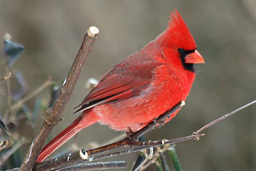

In [4]:
im = Image.open(dest)
im.to_thumb(256,256)
# images are made of numbers

In [5]:
searches = "forest", "bird"
path = Path('bird_or_not')
path.mkdir(exist_ok=True)  # Create 'bird_or_not' directory if it doesn't exist
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_ddg(f'{o} photos')
    download_images(dest, urls=results[:200])
    resize_images(dest, max_size=400, dest=dest)

In [6]:
#delete the photos that dont work

failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#5) [None,None,None,None,None]

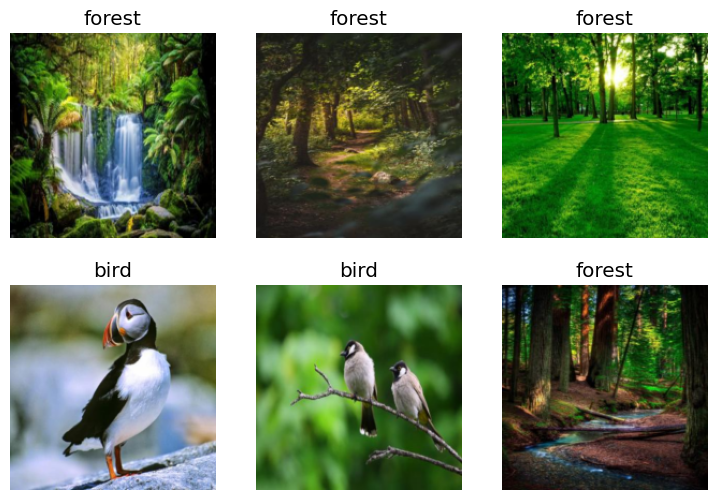

In [7]:
#Gives fastAI all the info to create a computer vision model 
dls = DataBlock(
    blocks = (ImageBlock, CategoryBlock), #what kind of model to build for you
    get_items = get_image_files, #get the images from a file 
    splitter = RandomSplitter(valid_pct=0.2, seed=42), #How to create a validation set 20%
    get_y=parent_label, #how to know the correct label --> returns the parent folder of a path 
    item_tfms = [Resize(192, method='squish')], #transforms to apply to the images
).dataloaders(path) #where to get the data from 

dls.show_batch(max_n=6) #show me a batch of the data that will be provided to the model. What kind of labels are we sending?

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate) 
#a learner that combines a model (the actual neural network) with a dataloader. resnet18 is a model that has been trained on imagenet
learn.fine_tune(3)

#you can use pytorch image models timm fastai


# First thing it does it downloads the model from the internet
# Someone has already trained that model ImageDet dataset
# fastai download with a network that does well 

#fine_tune --> Takes those pre traineds weights and adjust them in a control way to teach the model the differences between your dataset
#  and what was originally downloaded 

/home/sebastian/.local/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,0.634480,0.004533,0.000000,00:22


epoch,train_loss,valid_loss,error_rate,time
0,0.014922,0.005480,0.000000,00:32
1,0.008271,0.011296,0.006757,00:30
2,0.005095,0.007350,0.006757,00:32


In [9]:
is_bird,_,probs = learn.predict('bird.jpg')
print(f"Is this a bird?: {is_bird}.")
print(f"Probability it's a bird: {probs[0].item():.4f}")

Is this a bird?: bird.
Probability it's a bird: 1.0000


- neural networks build the features for us.
- We dont give it features, they learn features. 
- Combine features to create more features.
- Feed it examples --> Create features for itself --> combine these features --> create geometric shapes.
- The deeper it gets, the more sophisticated it gets.
How neural network do that naturally? 

Image based algorithms --> Foundational techniques creatively --> You can use it for anything. 
transfer learning 

Pytorch is gaining more popularity than Tensorflow. 

# Segmentation

- Take photos and we color in every pixe according to what it is.
- SegementationDataLoeaders 

In [10]:
from fastai.vision.all import *

path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)
learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

epoch,train_loss,valid_loss,time
0,2.987724,2.210907,00:19


epoch,train_loss,valid_loss,time
0,1.920289,1.665791,00:22
1,1.658631,1.367167,00:22
2,1.490880,1.198055,00:24
3,1.343375,1.060876,00:23
4,1.208603,0.915685,00:23
5,1.091166,0.888336,00:22
6,0.991105,0.830348,00:23
7,0.915170,0.826641,00:24


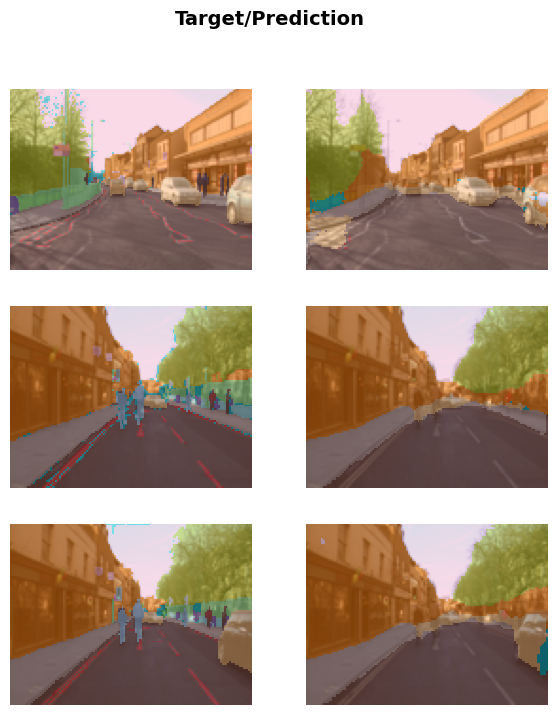

In [12]:
learn.show_results(max_n=3, figsize=(7,8))

# Tabular Analysis - income prediction

In [3]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE) #downloads data provided from fastAI. Commom datasets

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race'], # categorial columns
    cont_names = ['age', 'fnlwgt', 'education-num'], # continuos columns
    procs = [Categorify, FillMissing, Normalize])
dls.show_batch() #see the data

#type dispatch ---> automatically do the right thing in my data, get something useful regardless of something i provided 


/home/sebastian/.local/lib/python3.10/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)


,workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,salary
0,Private,Masters,Married-civ-spouse,Prof-specialty,Wife,White,False,40.0,99604.002837,14.0,>=50k
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,50.0,83311.005988,13.0,<50k
2,Federal-gov,Some-college,Never-married,Adm-clerical,Not-in-family,White,False,34.0,194739.999867,10.0,<50k
3,Private,HS-grad,Never-married,Tech-support,Not-in-family,Black,False,25.0,323544.998592,9.0,<50k
4,Federal-gov,Some-college,Married-civ-spouse,Tech-support,Husband,White,False,44.0,220563.001287,10.0,<50k
5,Private,Some-college,Never-married,Exec-managerial,Own-child,White,False,27.0,147340.001089,10.0,<50k
6,Private,12th,Divorced,Transport-moving,Unmarried,White,False,51.0,99316.002951,8.0,<50k
7,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,False,18.0,36881.999702,9.0,<50k
8,Private,HS-grad,Never-married,Other-service,Own-child,White,False,19.0,184736.999863,9.0,<50k
9,Private,Some-college,Never-married,Adm-clerical,Unmarried,White,False,27.0,89598.003029,10.0,<50k


In [4]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(2)
#There is not a single model that is the best for all the datasets.

epoch,train_loss,valid_loss,accuracy,time
0,0.381668,0.365294,0.830006,00:02
1,0.353794,0.355734,0.837070,00:02


# Collaborative Filtering - Recommendation system

In [6]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
dls.show_batch()

,userId,movieId,rating
0,268,150,4.5
1,311,2628,2.5
2,213,2716,2.0
3,220,778,5.0
4,607,1210,4.5
5,463,110,5.0
6,355,293,4.5
7,105,4226,4.0
8,212,110,5.0
9,187,58559,4.0


In [7]:
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523880,1.375549,00:00


epoch,train_loss,valid_loss,time
0,1.377518,1.312494,00:00
1,1.286058,1.116753,00:00
2,1.029850,0.799225,00:00
3,0.815473,0.654884,00:00
4,0.707812,0.619779,00:00
5,0.668141,0.608668,00:00
6,0.644190,0.602871,00:00
7,0.639030,0.600553,00:00
8,0.633954,0.600204,00:00
9,0.635385,0.599999,00:00


In [8]:
learn.show_results() #show me the results of the model

,userId,movieId,rating,rating_pred
0,1.0,61.0,3.0,3.897422
1,75.0,54.0,3.0,4.342596
2,88.0,29.0,5.0,4.198232
3,11.0,67.0,3.0,3.542419
4,62.0,56.0,3.0,4.193427
5,11.0,31.0,4.5,3.718106
6,60.0,1.0,4.5,4.111538
7,41.0,24.0,4.0,3.660069
8,41.0,32.0,3.0,3.334929


- Natural Language Processing: 
    - Answering questions
    - Speech recognition
    - Summarizing documents
    - Classifying documents
    - Finding names, dates, etc in documents
    - Seearching for articles mentioning a concept 
- Computer vision:
    - Satellite and drone imagery interpretation (disaster resilience)
    - Face recognition
    - Image captioning
    - Reading traffic signs
    - Locating pedistrians and vehicles in autonomous vehicles
- Medicine
- Biology
- Image generation
- Recommendation system
- Playing games
- Robotics
- Other applications:
     - Financial and logistical foreescarting
     - Text to speech

- deep Learning takes the inputs and weights (parameters) and uses them in their functions.
- The model doesnt do anything useful unless the weights are carefully chosen. 
- Iterate over the results and calculate the loss (how good are the results)
- We need a mechanism to improve the loss by changing the weights.